<a href="https://www.kaggle.com/code/akachimaduako/ford-gobike-system-data-part1?scriptVersionId=103101179" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Part I - Ford GoBike System Data
## by Maduako Akachi

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# load in the dataset into a pandas dataframe, print statistics
bike_df = pd.read_csv('../input/ford-gobike-2019feb-tripdata/201902-fordgobike-tripdata.csv')

Overview of data composition and information

In [3]:
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


Drop irrelevant columns to tidy up the dataframe

In [4]:
#drop start_station_id, start_station_name, end_station_id, end_station_name, 'start_time', 'end_time', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'bike_id' and 'bike_share_for_all_trip'

bike_df.drop(['start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'start_time', 'end_time', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'bike_share_for_all_trip'], axis=1, inplace=True)

In [5]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   duration_sec       183412 non-null  int64  
 1   user_type          183412 non-null  object 
 2   member_birth_year  175147 non-null  float64
 3   member_gender      175147 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 5.6+ MB


In [6]:
#check for null vaues
bike_df.isnull().sum()

duration_sec            0
user_type               0
member_birth_year    8265
member_gender        8265
dtype: int64

Fill up missing values with mean and mode

In [7]:
# fill up missing values in member_birth_year with the mean
mean_value = bike_df['member_birth_year'].mean()
print(mean_value)

bike_df['member_birth_year'].fillna(mean_value, inplace=True)

1984.8064368787361


In [8]:
# fill up missing values in member_gender with the mode
mode_value = bike_df['member_gender'].mode()[0]
print(mode_value)

bike_df['member_gender'].fillna(mode_value, inplace=True)

Male


continue cleaning the values in the columns

In [9]:
#make birth year a whole number

bike_df['member_birth_year'] = bike_df['member_birth_year'].astype(int)

In [10]:
#check again for null values
bike_df.isnull().sum()

duration_sec         0
user_type            0
member_birth_year    0
member_gender        0
dtype: int64

In [11]:
bike_df.describe()

,duration_sec,member_birth_year
count,183412.000000,183412.000000
mean,726.078435,1984.770097
std,1794.389780,9.887534
min,61.000000,1878.000000
25%,325.000000,1981.000000
50%,514.000000,1987.000000
75%,796.000000,1992.000000
max,85444.000000,2001.000000


In [12]:
bike_df.head()

,duration_sec,user_type,member_birth_year,member_gender
0,52185,Customer,1984,Male
1,42521,Customer,1984,Male
2,61854,Customer,1972,Male
3,36490,Subscriber,1989,Other
4,1585,Subscriber,1974,Male


In [13]:
bike_df['member_birth_year'].value_counts()

1984    14827
1988    10236
1993     9325
1989     8972
1990     8658
        ...  
1928        1
1878        1
1930        1
1910        1
1927        1
Name: member_birth_year, Length: 75, dtype: int64

In [14]:
bike_df['member_birth_year'].min()

1878

In [15]:
bike_df['member_birth_year'].max()

2001

In [16]:
#create a new column, AgeGroup to classify the member_birth_year
bins= [1878,1922,1972,1986,2001,2022]
labels = ['very_young','young','midlife','old','very_old']
bike_df['AgeGroup'] = pd.cut(bike_df['member_birth_year'], bins=bins, labels=labels, right=False)
display (bike_df.head())

,duration_sec,user_type,member_birth_year,member_gender,AgeGroup
0,52185,Customer,1984,Male,midlife
1,42521,Customer,1984,Male,midlife
2,61854,Customer,1972,Male,midlife
3,36490,Subscriber,1989,Other,old
4,1585,Subscriber,1974,Male,midlife


In [17]:
bike_df['AgeGroup'].value_counts()

old           100548
midlife        63046
young          19709
very_young        75
very_old          34
Name: AgeGroup, dtype: int64

In [18]:
bike_df['member_gender'].value_counts()

Male      138916
Female     40844
Other       3652
Name: member_gender, dtype: int64

### What is the structure of your dataset?

> There are 183412 entries in this dataset with 5 features (duration_sec, user_type, member_birth_year, member_gender and AgeGroup). There are two numerical columns and three categorical columns. The AgeGroup column was created to classify the member_birth_year into 5 different categories. very old, Old, midlife, young and very young.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out the relationship between the duration of the ride and the gender of the rider and also the relationship between the duration of the ride and the age group of the rider.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I will looking at all the features in the dataset. It is why i dropped all neccessary columns leaving what i consider to the important ones. 

## Univariate Exploration

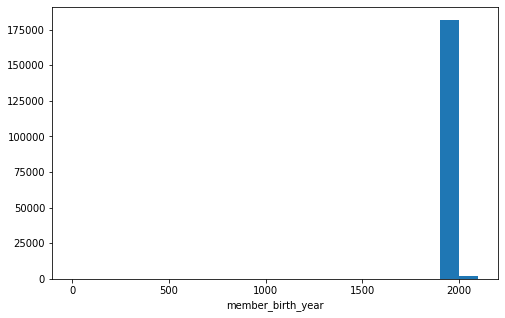

In [19]:
# start with a standard-scaled plot of the member_birth_year column
binsize = 100
bins = np.arange(0, bike_df['member_birth_year'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_df, x = 'member_birth_year', bins = bins)
plt.xlabel('member_birth_year')
plt.show()

The member_birth_year plot unfortunately does not give us much to work on except that it is positioned on the right hand side of the graph and is positively skewed. we need to move on the duration_sec plot

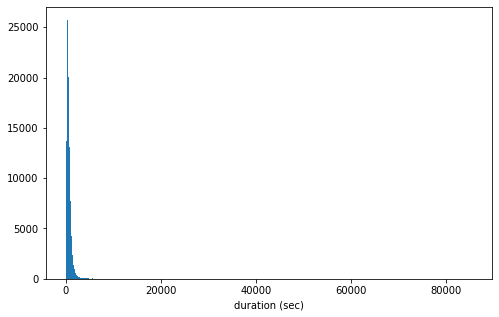

In [20]:
# start with a standard-scaled plot duration_sec
binsize = 100
bins = np.arange(0, bike_df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_df, x = 'duration_sec', bins = bins)
plt.xlabel('duration (sec)')
plt.show()

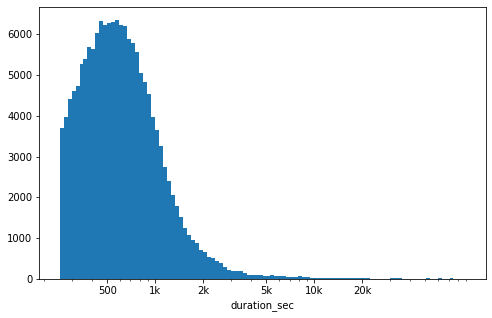

In [21]:
# there seems to be a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(bike_df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('duration_sec')
plt.show()

duration_sec has a long-tailed distribution when plotted on a log-scale, the distribution looks skewed to the right, peaking between 500 and 1000

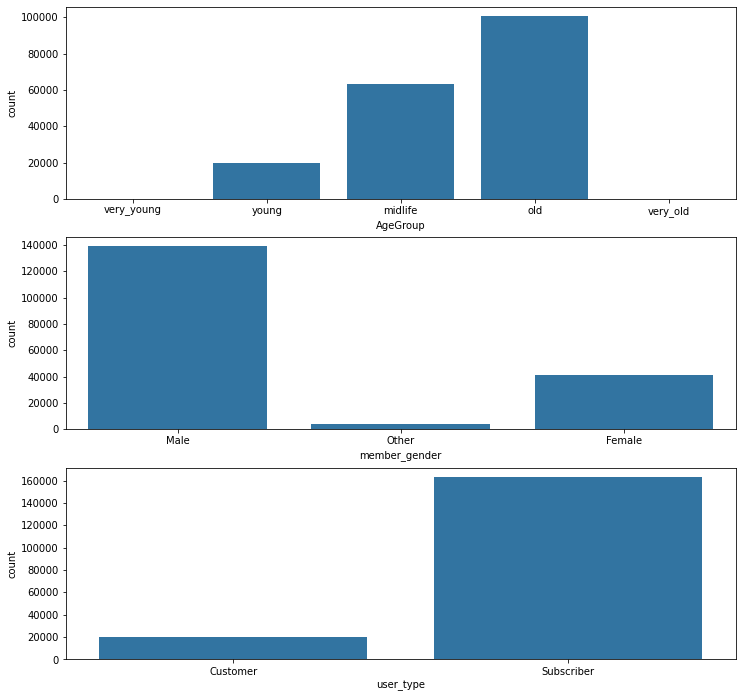

In [22]:
# let's plot the categorical columns together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [12,12])

default_color = sb.color_palette()[0]
sb.countplot(data = bike_df, x = 'AgeGroup', color = default_color, ax = ax[0])
sb.countplot(data = bike_df, x = 'member_gender', color = default_color, ax = ax[1])
sb.countplot(data = bike_df, x = 'user_type', color = default_color, ax = ax[2])

plt.show()

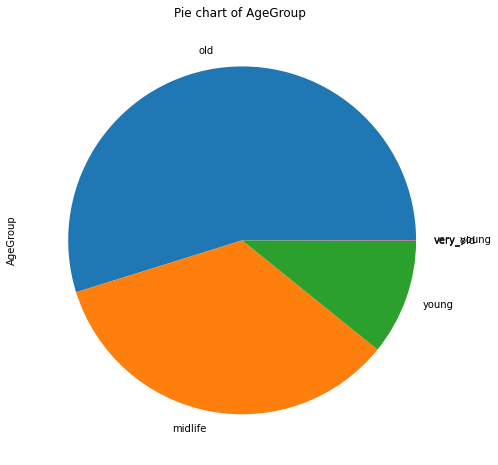

In [23]:
bike_df['AgeGroup'].value_counts().plot(kind='pie', title='Pie chart of AgeGroup ', figsize= (8,8));

bike_df['member_gender'].value_counts().plot(kind='pie', title='Pie chart of member_gender ', figsize= (8,8));

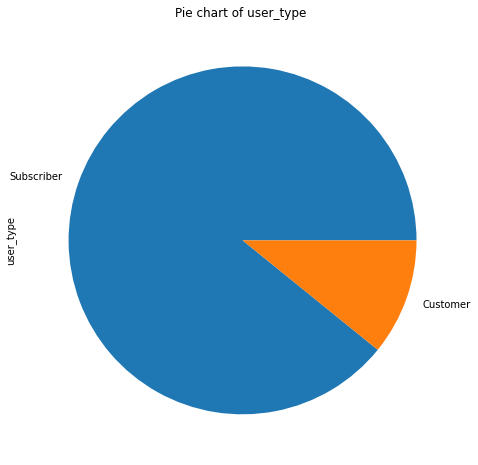

In [24]:
bike_df['user_type'].value_counts().plot(kind='pie', title='Pie chart of user_type ', figsize= (8,8));

majority of the users of the rideshare are in the midlife and old ages. there is a moderate amount of users who are young with very little amount of them very young and very old. As for their genders, most of the users are male with less than half of them females and very little amount of them with undisclosed genders. A significantly major part of the users are subscribers with very little amount of them falling into the customer category.

I'll now look at the other features in the data to see if any of them hold interesting properties.

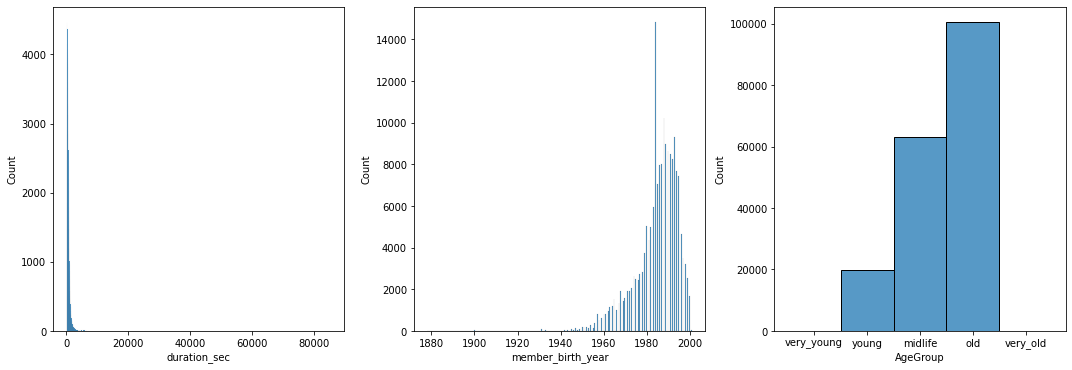

In [25]:
#The code below utilizes a loop to create individual histograms for all numeric variables.
cols = 3
rows = 3
num_cols = bike_df.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sb.histplot(x = bike_df[col], ax = ax)
    
fig.tight_layout()  
plt.show()

From the plots above, we can see that duration_sec plot is skewed to the right, member_birth_year is skewed to the left, agegroup plot is skewed to the left.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> As stated earlier, from the different plots we can see that majority of the users of the rideshare are in the midlife and old ages. there is a moderate amount of users who are young with very little amount of them very young and very old. As for their genders, most of the users are male with less than half of them females and very little amount of them with undisclosed genders. A significantly major part of the users are subscribers with very little amount of them falling into the customer category. There didn't seem to be any unusual points, therefore there was no need for any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There was nothing unusual in the distributions and so there was no need to perform any adjustments of the data.

## Bivariate Exploration

It would be better to use label encoding to get a better understanding of the correlation between agegroup and duration_sec. so that we know how the age group of the users influenced how long they used the bikes.

In [26]:
#Label Encoding

featured = [ 'AgeGroup' ]

for feature in featured:
  bike_df[f"{feature}_cat"] = bike_df[feature].astype('category')
  bike_df[f"{feature}_cat"] = bike_df[f"{feature}_cat"].cat.codes

In [27]:
bike_df.head()

,duration_sec,user_type,member_birth_year,member_gender,AgeGroup,AgeGroup_cat
0,52185,Customer,1984,Male,midlife,2
1,42521,Customer,1984,Male,midlife,2
2,61854,Customer,1972,Male,midlife,2
3,36490,Subscriber,1989,Other,old,3
4,1585,Subscriber,1974,Male,midlife,2


In [28]:
numeric_vars = ['duration_sec', 'AgeGroup_cat']
categoric_vars = ['user_type', 'member_gender', 'AgeGroup']

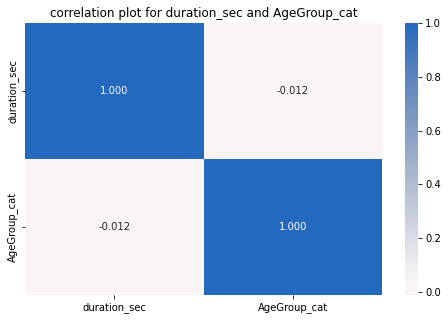

In [29]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(bike_df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('correlation plot for duration_sec and AgeGroup_cat')
plt.show()

bike_df.shape= (183412, 6)
bikeshare_samp.shape= (18000, 6)


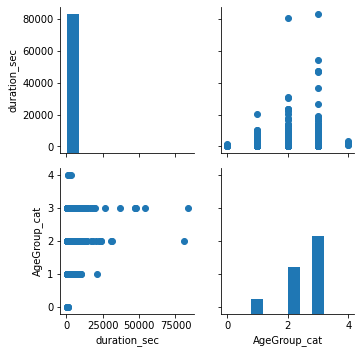

In [30]:
# plot matrix: sample 5000 bike shares so that plots are clearer and they render faster
print("bike_df.shape=",bike_df.shape)
bikeshare_samp = bike_df.sample(n=18000, replace = False)
print("bikeshare_samp.shape=",bikeshare_samp.shape)

g = sb.PairGrid(data = bikeshare_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 10);
g.map_offdiag(plt.scatter)

Text(0.5, 1.0, 'distribution of agegroup and time spent on rideshare')

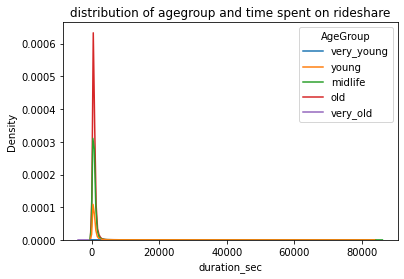

In [31]:
sb.kdeplot(x='duration_sec', data=bike_df, hue='AgeGroup')
plt.title('distribution of agegroup and time spent on rideshare')

Text(0.5, 1.0, 'distribution of user gender and time spent on rideshare')

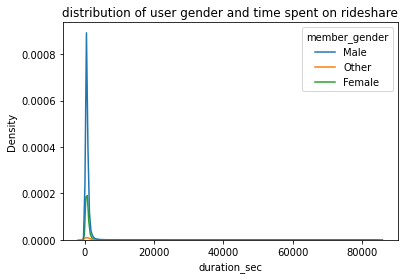

In [32]:
sb.kdeplot(x='duration_sec', data=bike_df, hue='member_gender')
plt.title('distribution of user gender and time spent on rideshare')

<AxesSubplot:xlabel='duration_sec', ylabel='Count'>

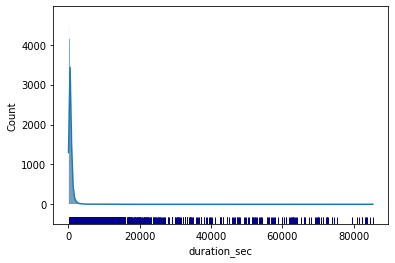

In [33]:
sb.rugplot(x='duration_sec', data=bike_df, height=.03, color='darkblue')
sb.histplot(x='duration_sec', data=bike_df, kde=True)

<Figure size 720x720 with 0 Axes>

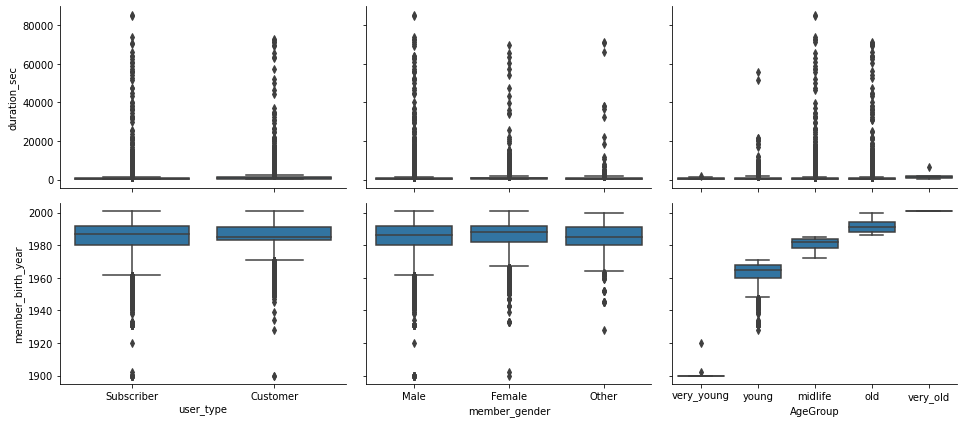

In [34]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

bikeshare_samp = bike_df.sample(n=64000, replace = False)


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = bikeshare_samp, y_vars = ['duration_sec', 'member_birth_year'], x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

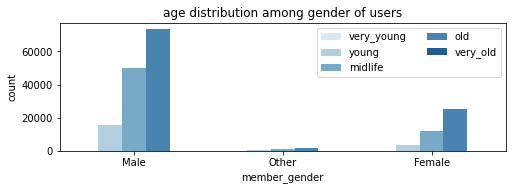

In [35]:
# since there's only one subplot to create, using the full data should be fine.
plt.figure(figsize = [8, 8])

# subplot 1: member_gender vs AgeGroup
ax = plt.subplot(3, 1, 2)
sb.countplot(data = bike_df, x = 'member_gender', hue = 'AgeGroup', palette = 'Blues')
ax.legend(ncol = 2)

plt.title('age distribution among gender of users')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From all the plots, I discovered that there is a direct corelation between agegroup_cat which is the encoded version of the agegroup, the agegroup itself and the duration_sec. We can also see there some outliers in the very young group of the agegroup variable, but they are of no consequence and so were not removed. This supports the discovery from the previous section that users in the midlife and the old group of the age group spent more time user the ride share than any of the other age groups.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There were some insignificant outliers that were left alone.

## Multivariate Exploration

> here I continued exploring the relationship between duration_sec and the other features.

Text(0.5, 1.0, 'facetgrid of agegroup distribution and time spent on rideshare')

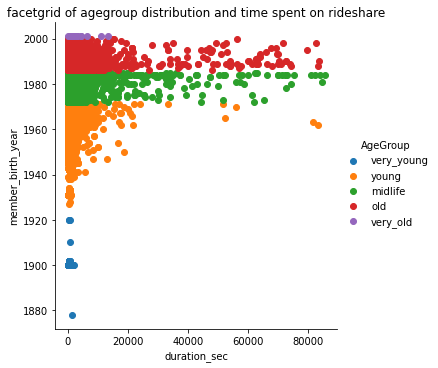

In [36]:
g = sb.FacetGrid(data = bike_df, hue = 'AgeGroup', height = 5)
g.map(plt.scatter, 'duration_sec', 'member_birth_year')
g.add_legend()
plt.title('facetgrid of agegroup distribution and time spent on rideshare')

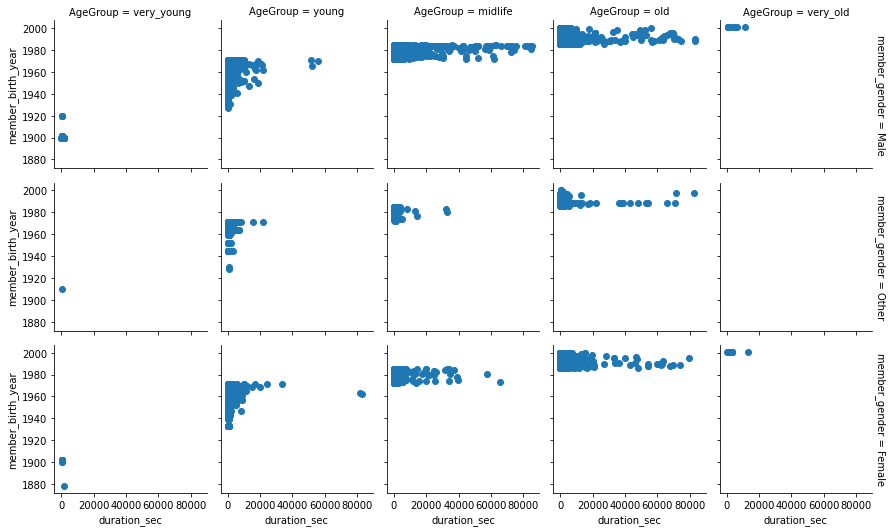

In [37]:
g = sb.FacetGrid(data = bike_df, col = 'AgeGroup', row = 'member_gender', height = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'duration_sec', 'member_birth_year')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation of duration_sec in this section by looking at the relatuionship between duratiion_sec, member_gender, agegroup and member_birth_year features. The multivariate exploration here showed that there indeed is a correlation between the duration_sec and agegroup as observed in the previous section.

In [38]:
#save cleaned dataset
bike_df.to_csv('cleaned_bike_df.csv', index=False)